<div align="center">
<h1><img width="30" src="https://madewithml.com/static/images/rounded_logo.png">&nbsp;<a href="https://madewithml.com/">Made With ML</a></h1>
Applied ML · MLOps · Production
<br>
Join 30K+ developers in learning how to responsibly <a href="https://madewithml.com/about/">deliver value</a> with ML.
    <br>
</div>

<br>

<div align="center">
    <a target="_blank" href="https://madewithml.com"><img src="https://img.shields.io/badge/Subscribe-40K-brightgreen"></a>&nbsp;
    <a target="_blank" href="https://github.com/GokuMohandas/MadeWithML"><img src="https://img.shields.io/github/stars/GokuMohandas/MadeWithML.svg?style=social&label=Star"></a>&nbsp;
    <a target="_blank" href="https://www.linkedin.com/in/goku"><img src="https://img.shields.io/badge/style--5eba00.svg?label=LinkedIn&logo=linkedin&style=social"></a>&nbsp;
    <a target="_blank" href="https://twitter.com/GokuMohandas"><img src="https://img.shields.io/twitter/follow/GokuMohandas.svg?label=Follow&style=social"></a>
    <br>
    🔥&nbsp; Among the <a href="https://github.com/GokuMohandas/MadeWithML" target="_blank">top MLOps</a> repositories on GitHub
</div>

<br>
<hr>

This notebooks contains the code for the 🔢&nbsp; Data and 📈&nbsp; Modeling lessons. After this proof of concept (PoC), we'll be moving all of this code to Python scripts and add interfacing, testing, etc. Follow the accompanying [lessons](https://madewithml.com/courses/mlops) as opposed to just running the code here to really develop an intuition for all concepts.

<div align="left">
<a target="_blank" href="https://madewithml.com/#mlops"><img src="https://img.shields.io/badge/📖 Read-lessons-9cf"></a>&nbsp;
<a href="https://github.com/GokuMohandas/mlops-course/blob/main/notebooks/tagifai.ipynb" role="button"><img src="https://img.shields.io/static/v1?label=&amp;message=View%20On%20GitHub&amp;color=586069&amp;logo=github&amp;labelColor=2f363d"></a>&nbsp;
<a href="https://colab.research.google.com/github/GokuMohandas/mlops-course/blob/main/notebooks/tagifai.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a>
</div>

> We highly recommend running this notebook on [Google Colab](https://colab.research.google.com/github/GokuMohandas/mlops-course/blob/main/notebooks/tagifai.ipynb) but if you want to run locally, you'll need to install the following:
```python
!pip install numpy==1.19.5 pandas==1.3.5 ipywidgets==7.7.0 \
             matplotlib==3.5.2 seaborn==0.11.2 wordcloud==1.8.1 \
             scikit-learn==0.24.2 -q
```

# 🔢&nbsp; Data

## Labeling

For the purpose of this course, our data is already labeled, so we'll perform a basic version of ETL (extract, transform, load) to construct the labeled dataset. However, labeling can be a time intensive process so it's very important to understand all its different facets so that we can have efficient labeling workflows. Learn more about labeling in our comprehnsive [labeling lesson](https://madewithml.com/courses/mlops/labeling/). 

We'll start by loading our data assets that we'll be working on. 

- [projects.csv](https://github.com/GokuMohandas/Made-With-ML/tree/main/datasets/projects.csv): projects with id, created time, title and description.
- [tags.csv](https://github.com/GokuMohandas/Made-With-ML/tree/main/datasets/tags.csv): labels (tag category) for the projects by id.

> Recall that our [objective](https://madewithml.com/courses/mlops/design#objectives) was to classify incoming content so that the community can discover them easily. These data assets will act as the training data for our first model.

**Extract**

We'll start by extracting data from our sources (external CSV files). Traditionally, our data assets will be stored, versioned and updated in a database, warehouse, etc. We'll learn more about these different [data systems](https://madewithml.com/courses/mlops/data-stack/) later, but for now, we'll load our data as a stand-alone CSV file.

In [1]:
import pandas as pd

In [2]:
# Extract projects
PROJECTS_URL = "https://raw.githubusercontent.com/GokuMohandas/Made-With-ML/main/datasets/projects.csv"
projects = pd.read_csv(PROJECTS_URL)
projects.head(5)

,id,created_on,title,description
0,6,2020-02-20 06:43:18,Comparison between YOLO and RCNN on real world...,Bringing theory to experiment is cool. We can ...
1,7,2020-02-20 06:47:21,"Show, Infer & Tell: Contextual Inference for C...",The beauty of the work lies in the way it arch...
2,9,2020-02-24 16:24:45,Awesome Graph Classification,"A collection of important graph embedding, cla..."
3,15,2020-02-28 23:55:26,Awesome Monte Carlo Tree Search,A curated list of Monte Carlo tree search pape...
4,19,2020-03-03 13:54:31,Diffusion to Vector,Reference implementation of Diffusion2Vec (Com...


We'll also load the labels (tag category) for our projects.

In [3]:
# Extract tags
TAGS_URL = "https://raw.githubusercontent.com/GokuMohandas/Made-With-ML/main/datasets/tags.csv"
tags = pd.read_csv(TAGS_URL)
tags.head(5)

,id,tag
0,6,computer-vision
1,7,computer-vision
2,9,graph-learning
3,15,reinforcement-learning
4,19,graph-learning


**Transform**

Apply basic transformations to create our labeled dataset.

In [4]:
# Join projects and tags
df = pd.merge(projects, tags, on="id")
df.head()

,id,created_on,title,description,tag
0,6,2020-02-20 06:43:18,Comparison between YOLO and RCNN on real world...,Bringing theory to experiment is cool. We can ...,computer-vision
1,7,2020-02-20 06:47:21,"Show, Infer & Tell: Contextual Inference for C...",The beauty of the work lies in the way it arch...,computer-vision
2,9,2020-02-24 16:24:45,Awesome Graph Classification,"A collection of important graph embedding, cla...",graph-learning
3,15,2020-02-28 23:55:26,Awesome Monte Carlo Tree Search,A curated list of Monte Carlo tree search pape...,reinforcement-learning
4,19,2020-03-03 13:54:31,Diffusion to Vector,Reference implementation of Diffusion2Vec (Com...,graph-learning


In [5]:
# Remove projects with no tag
df = df[df.tag.notnull()]

**Load**

Finally, we'll load our transformed data locally so that we can use it for our machine learning application.

In [6]:
# Save locally
df.to_csv("../data/labeled_projects.csv", index=False)

## Exploration (EDA)

Exploratory data analysis to understand the signals and nuances of our dataset. It's a cyclical process that can be done at various points of our development process (before/after labeling, preprocessing, etc. depending on how well the problem is defined. For example, if we're unsure how to label or preprocess our data, we can use EDA to figure it out.

In [7]:
from collections import Counter
import ipywidgets as widgets
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
sns.set_theme()
warnings.filterwarnings("ignore")

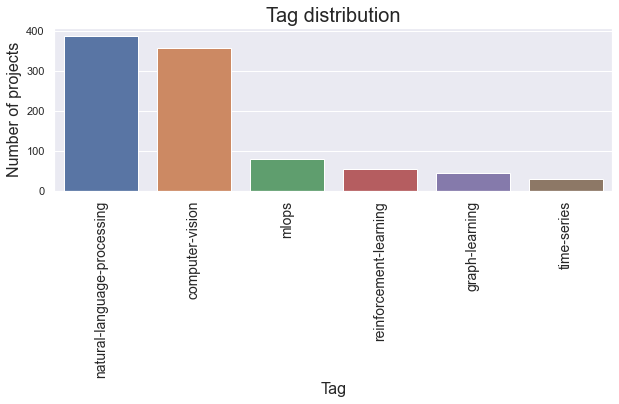

In [8]:
# Distribution of tags
tags, tag_counts = zip(*Counter(df.tag.values).most_common())
plt.figure(figsize=(10, 3))
ax = sns.barplot(list(tags), list(tag_counts))
plt.title("Tag distribution", fontsize=20)
plt.xlabel("Tag", fontsize=16)
ax.set_xticklabels(tags, rotation=90, fontsize=14)
plt.ylabel("Number of projects", fontsize=16)
plt.show()

In [9]:
# Most common tags
tags = Counter(df.tag.values)
tags.most_common()

[('natural-language-processing', 388),
 ('computer-vision', 356),
 ('mlops', 79),
 ('reinforcement-learning', 56),
 ('graph-learning', 45),
 ('time-series', 31)]

> We'll address the [data imbalance](https://madewithml.com/courses/mlops/baselines#data-imbalance) after splitting into our train split and prior to training our model.

In [10]:
# Most frequent tokens for each tag
@widgets.interact(tag=list(tags))
def display_word_cloud(tag="natural-language-processing"):
    # Plot word clouds top top tags
    plt.figure(figsize=(15, 5))
    subset = df[df.tag==tag]
    text = subset.title.values
    cloud = WordCloud(
        stopwords=STOPWORDS, background_color="black", collocations=False,
        width=500, height=300).generate(" ".join(text))
    plt.axis("off")
    plt.imshow(cloud)

interactive(children=(Dropdown(description='tag', index=3, options=('computer-vision', 'graph-learning', 'rein…

Looks like the `title` text feature has some good signal for the respective classes and matches our intuition. We can repeat this for the `description` text feature as well. This information will become useful when we decide how to use our features for modeling.

## Preprocessing

Preprocessing the data via feature engineering, filtering and cleaning. Certain preprocessing steps are global (don't depend on our dataset, ex. lower casing text, removing stop words, etc.) and others are local (constructs are learned only from the training split, ex. vocabulary, standardization, etc.). For the local, dataset-dependent preprocessing steps, we want to ensure that we [split](https://madewithml.com/courses/mlops/splitting) the data first before preprocessing to avoid data leaks.

### Feature engineering

We can combine existing input features to create new meaningful signal (helping the model learn). 

In [11]:
# Feature engineering
df["text"] = df.title + " " + df.description

### Cleaning

Since we're dealing with text data, we can apply some of the commoon text processing steps:

In [12]:
!pip install nltk==3.7 -q

In [13]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, SnowballStemmer
import re

In [14]:
nltk.download('stopwords')
STOPWORDS = stopwords.words("english")
porterStemmer = PorterStemmer()
snowBallStemmer = SnowballStemmer("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kristofferclausen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
def clean_text(text: str, lower=True, stemmer=False, stopwords=STOPWORDS):
    """CLean the raw text """
    # Lower
    if lower:
        text = text.lower()
    
    # Remove stopwords
    if len(stopwords):
        pattern = re.compile(r'\b(' + r"|".join(stopwords) + r")\b\s*")
        text = pattern.sub('', text)
        
    # Spacing and filters
    text = re.sub(
        r"([!\"'#$%&()*\+,-./:;<=>?@\\\[\]^_`{|}~])", r" \1 ", text
    )  # add spacing between objects to be filtered
    text = re.sub("[^A-Za-z0-9]+", " ", text)  # remove non alphanumeric chars
    text = re.sub(" +", " ", text)  # remove multiple spaces
    text = text.strip()  # strip white space at the ends
    
    # Remove links
    text = re.sub(r"http\S+", "", text)

    # Stemming
    if stemmer:
        text = " ".join([stemmer.stem(word) for word in text.split(" ")])

    return text

In [16]:
# Apply text cleaning function to data
original_df = df.copy()
df.text = df.text.apply(clean_text, lower=True, stemmer=snowBallStemmer)
print(f"{original_df.text.values[0]}\n{df.text.values[0]}")

Comparison between YOLO and RCNN on real world videos Bringing theory to experiment is cool. We can easily train models in colab and find the results in minutes.
comparison yolo rcnn real world video bring theori experi cool easili train model colab find result minut


In [17]:
# Toggle preprocessing parameters
@widgets.interact(lower=True, stemmer=[porterStemmer, snowBallStemmer])
def display_cleaned_text(lower, stemmer):
    text = original_df.text.values[0]
    cleaned_text = clean_text(text=text, lower=lower, stemmer=stemmer)
    print(cleaned_text)

interactive(children=(Checkbox(value=True, description='lower'), Dropdown(description='stemmer', options=(<Por…

In [18]:
snowBallStemmer